## Calculate Interpretability Data!

## Prep for analysis

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import tensorflow as tf
import random 
from datetime import datetime
import pandas as pd
import os 

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp
from trainGordon_utils import subset, build_model, fullmodel, scheduler, plot_results, adjust_spines
from dataprep_utils import get_testing_obs
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/interpret/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/interpret/')
from Gordon_interp import getoutputvecs, confvacc, iconfcorr


# import importlib
# importlib.reload(sys.modules["Gordon_interp"])
# from Gordon_interp import getoutputvecs, confvacc, iconfcorr
# importlib.reload(sys.modules["trainGordon_utils"])
# from trainGordon_utils import subset, build_model, fullmodel, scheduler, plot_results

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

2023-09-27 11:03:40.011023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 11:03:40.316078: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Load network:

In [2]:
MODEL_DIR = '/glade/scratch/wchapman/ENSOmjo_ML_models/saved_models/'
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)
# variables:
DROPOUT_RATE = hps['DROPOUT_RATE']

MODELNAME1 = 'ENSO'
RIDGE1 = hps['RIDGE1']
HIDDENS1 = hps['HIDDENS1']

MODELNAME2 = 'MJO'
RIDGE2 = hps['RIDGE2']
HIDDENS2 = hps['HIDDENS2']

BATCH_SIZE = hps['BATCH_SIZE']
N_EPOCHS = 10000
PATIENCE = hps['PATIENCE'] # number of epochs of no "improvement" before training is stopped
LR = hps['LR'] # learning rate


LEADS = np.arange(7,31)
AVGS = np.arange(7,32)
SEEDS = np.arange(1,6)

SAVE = True

### Analyze Data

LEAD: 7
AVG: 7


2023-09-27 11:03:59.581344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


174/174 [==============================] - 0s 2ms/step


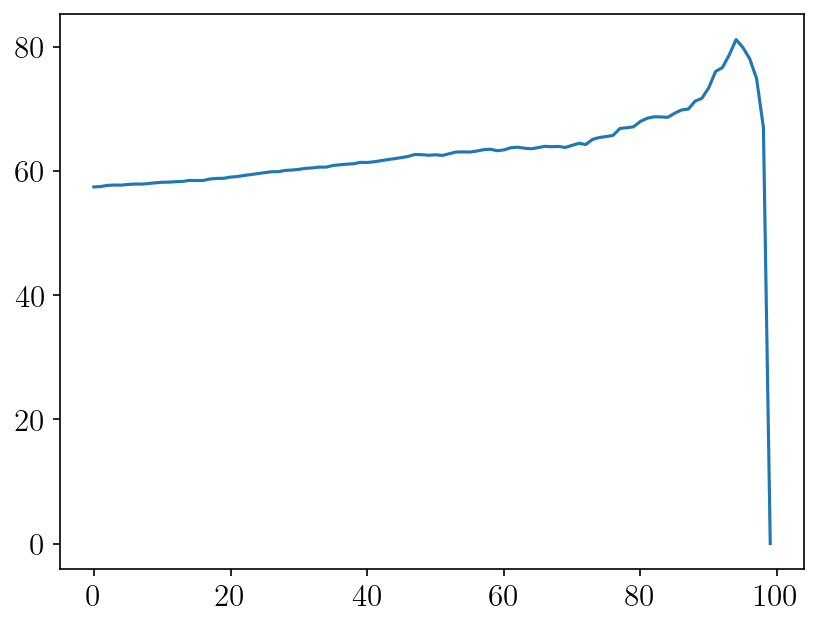

[[-0.08324125  0.07581096]
 [-0.08327767  0.0758461 ]
 [-0.08320405  0.07577784]
 ...
 [-0.0855355   0.07790437]
 [-0.08539171  0.07777435]
 [-0.08523393  0.07763222]] [[ 0.01062223 -0.01701775]
 [ 0.04730159 -0.07095518]
 [ 0.07529405 -0.11242931]
 ...
 [-0.18434365  0.25836498]
 [-0.23032846  0.32808149]
 [-0.26906359  0.38714042]] [[0.46719414 0.53280586]
 [0.48978463 0.51021528]
 [0.50718486 0.49281514]
 ...
 [0.35293832 0.64706177]
 [0.32704604 0.67295396]
 [0.30596104 0.69403887]]
0.2518820577164366 0.28983688833124216 0.4582810539523212
0.23730644580482535 0.3215700396110911 0.44112351458408355
0.1494149414941494 0.13771377137713772 0.7128712871287128
0.16158940397350993 0.09271523178807947 0.7456953642384105
174/174 [==============================] - 0s 2ms/step


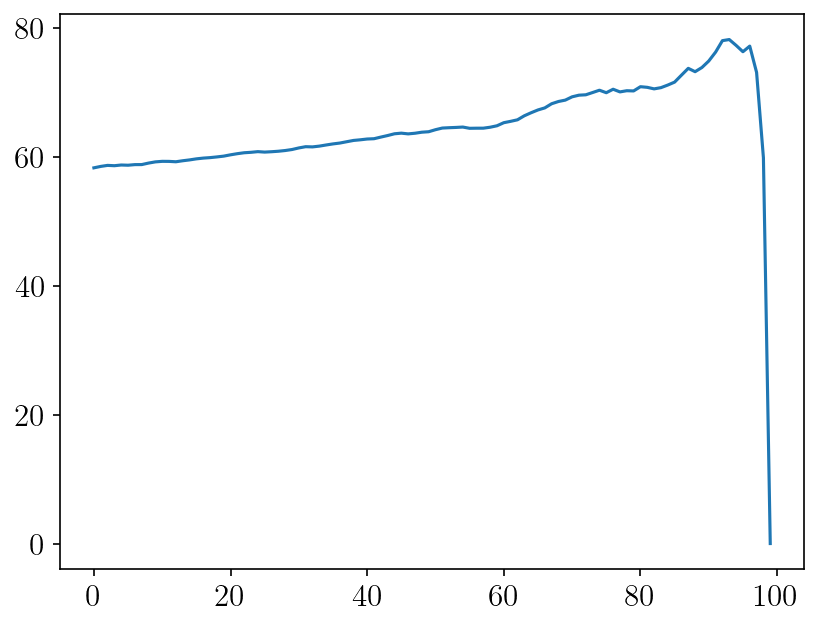

[[-0.17302394  0.22035132]
 [-0.17299867  0.22032154]
 [-0.17290401  0.22020715]
 ...
 [-0.17522772  0.22306891]
 [-0.17507371  0.2228777 ]
 [-0.17489485  0.22265677]] [[ 0.04383184 -0.01708113]
 [ 0.11746699 -0.08316354]
 [ 0.18617845 -0.14659409]
 ...
 [-0.07130678  0.08281703]
 [-0.07430732  0.08590393]
 [-0.07430732  0.08590393]] [[0.41764161 0.58235836]
 [0.45197606 0.54802388]
 [0.48491994 0.51508009]
 ...
 [0.36530307 0.63469696]
 [0.36397269 0.63602728]
 [0.36406526 0.63593477]]
0.35672333848531684 0.19690880989180834 0.4463678516228748
0.3512783579402233 0.22704357220021607 0.4216780698595607
0.1422142214221422 0.16741674167416742 0.6903690369036903
0.13850063532401524 0.10546378653113088 0.7560355781448539
174/174 [==============================] - 0s 2ms/step


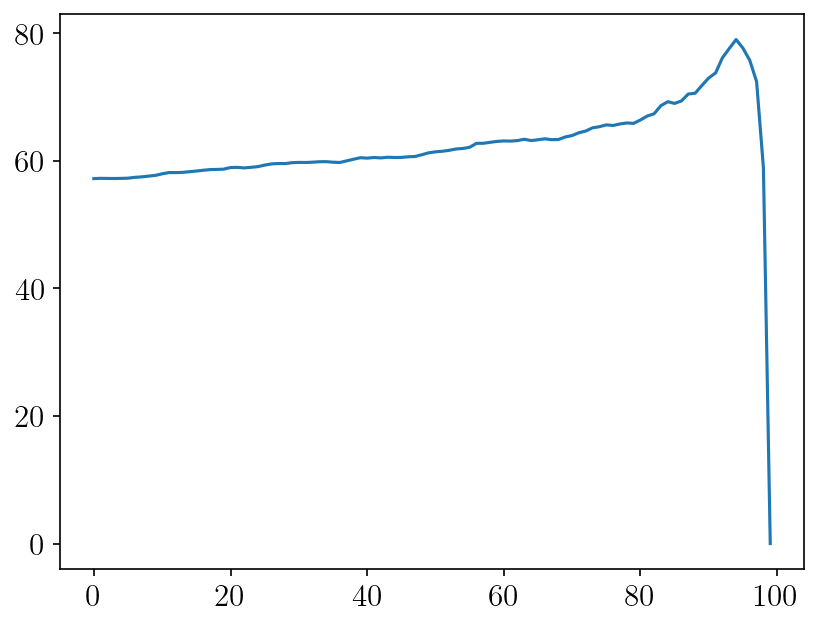

[[-0.08746142  0.13299866]
 [-0.08748715  0.13304065]
 [-0.08744486  0.1329715 ]
 ...
 [-0.0890796   0.13564444]
 [-0.08896831  0.13546239]
 [-0.08884387  0.13525887]] [[-0.00735523  0.00478719]
 [ 0.06098899 -0.01689004]
 [ 0.15529467 -0.04749388]
 ...
 [-0.29026642  0.16893494]
 [-0.36041108  0.21540038]
 [-0.41567051  0.25217339]] [[0.44211012 0.55788982]
 [0.46439815 0.53560185]
 [0.49559316 0.50440687]
 ...
 [0.33538577 0.66461426]
 [0.30997372 0.69002628]
 [0.29070824 0.7092917 ]]
0.25668449197860965 0.24347279018559295 0.4998427178357974
0.24918977313647822 0.2972632337054375 0.4535469931580843
0.1152115211521152 0.12331233123312331 0.7614761476147615
0.11653116531165311 0.06639566395663957 0.8170731707317073
174/174 [==============================] - 0s 2ms/step


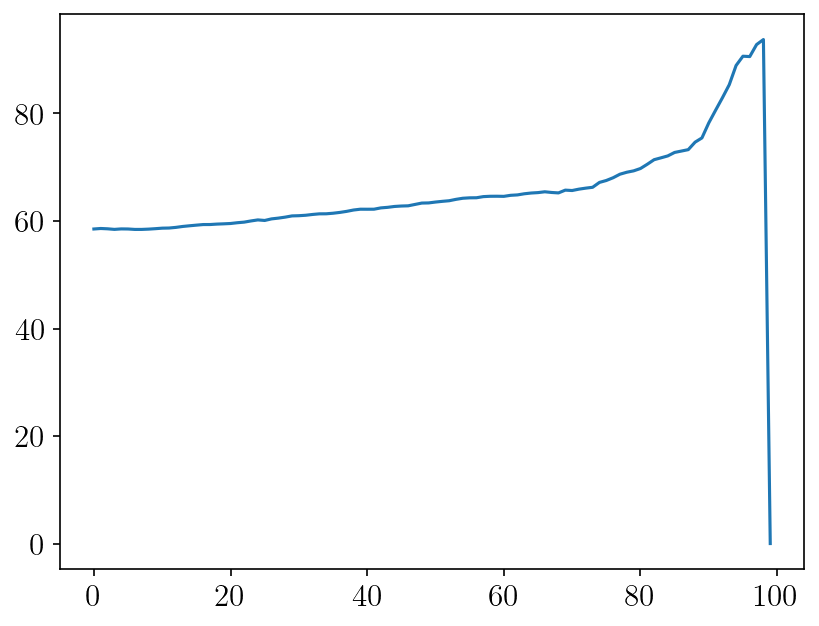

[[-0.08146796  0.07481055]
 [-0.08144844  0.07480384]
 [-0.0813336   0.07471668]
 ...
 [-0.08353885  0.07652236]
 [-0.08340564  0.07641301]
 [-0.0832509   0.07628793]] [[ 0.00645907 -0.01085038]
 [ 0.04781673 -0.06565731]
 [ 0.07415871 -0.10971534]
 ...
 [-0.19374239  0.24044688]
 [-0.2543245   0.32450953]
 [-0.29689944  0.38248068]] [[0.46531352 0.53468645]
 [0.48930708 0.51069295]
 [0.5069555  0.4930445 ]
 ...
 [0.3556602  0.6443398 ]
 [0.32329881 0.67670113]
 [0.30176252 0.69823748]]
0.25846153846153846 0.27784615384615385 0.4636923076923077
0.2439683111271156 0.30662585523946706 0.44940583363341735
0.1494149414941494 0.10801080108010801 0.7425742574257426
0.15612903225806452 0.08645161290322581 0.7574193548387097
174/174 [==============================] - 0s 2ms/step


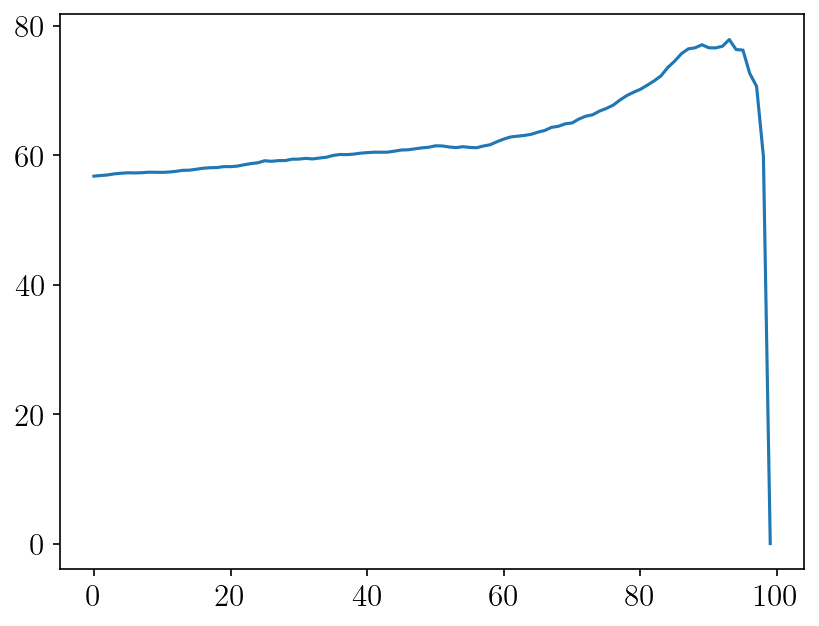

[[-0.05792346  0.14386252]
 [-0.0578021   0.1438102 ]
 [-0.05764675  0.14368606]
 ...
 [-0.05952477  0.1466464 ]
 [-0.05938719  0.14643526]
 [-0.05922687  0.14618959]] [[-0.00844531 -0.05847839]
 [ 0.04119306 -0.09500117]
 [ 0.09980118 -0.14199094]
 ...
 [-0.17784053  0.10081317]
 [-0.23698401  0.15756544]
 [-0.29079264  0.21098645]] [[0.46213442 0.53786558]
 [0.48365128 0.51634866]
 [0.51011348 0.48988655]
 ...
 [0.38111344 0.61888653]
 [0.35425863 0.6457414 ]
 [0.33021882 0.66978115]]
0.31652394544877893 0.20647002854424357 0.4770060260069775
0.3098667626935542 0.24954987396471012 0.4405833633417357
0.21332133213321333 0.0711071107110711 0.7155715571557155
0.23333333333333334 0.03076923076923077 0.735897435897436
saving
LEAD: 7
AVG: 8
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 7
AVG: 9
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 7
AVG: 10
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 7
AVG: 11
175/175 [===========

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



174/174 [==============================] - 0s 2ms/step
saving
LEAD: 18
AVG: 26
174/174 [==============================] - 0s 2ms/step
saving
LEAD: 18
AVG: 30
174/174 [==============================] - 0s 2ms/step
saving
LEAD: 18
AVG: 31
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 7
174/174 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 8
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 9
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 10
176/176 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 11
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 12
176/176 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 13
176/176 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 14
177/177 [==============================] - 0s 2ms/step
saving
LEAD: 19
AVG: 15
177/177 [==============================] - 0s 2ms/step


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



175/175 [==============================] - 0s 1ms/step
saving
LEAD: 21
AVG: 12
176/176 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 13
176/176 [==============================] - 0s 1ms/step
saving
LEAD: 21
AVG: 14
177/177 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 15
177/177 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 16
175/175 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 17
175/175 [==============================] - 0s 1ms/step
saving
LEAD: 21
AVG: 18
174/174 [==============================] - 0s 1ms/step
saving
LEAD: 21
AVG: 19
173/173 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 20
173/173 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 21
173/173 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 22
173/173 [==============================] - 0s 2ms/step
saving
LEAD: 21
AVG: 23
173/173 [==============================] - 0s 1ms/st

In [ ]:
# model raw predictions
# confidence vs accuracy
# model contribution fractions

for l in LEADS:
    for a in AVGS:
        print('LEAD: '+str(l)+'\nAVG: '+str(a))
        
        #check if files already exist:
        ddir_save = '/glade/scratch/kjmayer/DATA/ENSOvsMJO/data/'
        finame_confvsacc = 'confvsacc_obs_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
        if not os.path.isfile(ddir_save+finame_confvsacc):
            # print('load testing data')
            X1test, X2test, Ytest = get_testing_obs(N_z500runmean=a,
                                                LEAD=l)

            INPUT_SHAPE1 = np.shape(X1test)[1:][0]
            INPUT_SHAPE2 = np.shape(X2test)[1:][0]

            confvsacc = np.zeros(shape=(len(SEEDS),100))

            model1_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))
            model2_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))
            model_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))
            
            model1_all_fracpred = np.zeros(shape=(len(SEEDS)))
            model2_all_fracpred = np.zeros(shape=(len(SEEDS)))
            model12_all_fracpred = np.zeros(shape=(len(SEEDS)))
            
            model1_allcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            model2_allcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            model12_allcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            
            model1_conf_fracpred = np.zeros(shape=(len(SEEDS)))
            model2_conf_fracpred = np.zeros(shape=(len(SEEDS)))
            model12_conf_fracpred = np.zeros(shape=(len(SEEDS)))
            
            model1_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            model2_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            model12_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))
            
            
            for s in SEEDS:
                # ENSO MODEL
                model1, input1 = build_model(s,
                                             DROPOUT_RATE,
                                             RIDGE1,
                                             HIDDENS1,
                                             INPUT_SHAPE1,
                                             MODELNAME1)
                # MJO MODEL
                model2, input2 = build_model(s,
                                             DROPOUT_RATE,
                                             RIDGE2,
                                             HIDDENS2,
                                             INPUT_SHAPE2,
                                             MODELNAME2)   
                # COMBINE ENSO & MJO MODEL
                model = fullmodel(model1, model2,
                                  input1, input2,
                                  s)

                MODEL_FINAME = 'LEAD_'+str(l)+'_AVG_'+str(a)+'__0000'+str(s)+'.h5'
                model.load_weights(MODEL_DIR+MODEL_FINAME)

                model_rawpreds[s-1] = model.predict((X1test,X2test))
                conf    = np.max(model_rawpreds[s-1],axis=-1)
                predval = np.argmax(model_rawpreds[s-1],axis=-1)
                
                # ------- confident predictions --------------------------------------------------------
                per = 80
                conf_thresh = np.percentile(conf,q=per)
                # -------- confident [i_conf_predval] --------
                i_conf_predval = np.where(conf > conf_thresh)[0]
                
                
                # ----- confidence vs accuracy for all seeds: -------------------------------------------
                confvsacc[s-1], _, _ = confvacc(confval = conf,
                                              predval = predval,
                                              Ytest   = Ytest)
                
                # ----- model contribution: ------------------------------------------------------------
                model1_rawpreds[s-1], model2_rawpreds[s-1] = getoutputvecs(model,
                                                                       model1,
                                                                       model2,
                                                                       X1test,
                                                                       X2test)
                # model X winning class (model X output * weight)
                model1pred = np.argmax(model1_rawpreds[s-1],axis=1)
                model2pred = np.argmax(model2_rawpreds[s-1],axis=1)

                # --------------------------------------------------------------------------------------
                # ---------- all predictions contribution: ---------------------------------------------
                # --------------------------------------------------------------------------------------
                i_model1_samefinalpred = model1pred==predval
                i_model2_samefinalpred = model2pred==predval
                
                # terminology: "win" = modelX prediction is also full model prediction
                # model X same as final prediction & model ~X does not have that prediction
                i_model1win = i_model1_samefinalpred & ~i_model2_samefinalpred
                i_model2win = i_model2_samefinalpred & ~i_model1_samefinalpred
                # model 1&2 have same final prediction
                i_model12win = i_model1_samefinalpred & i_model2_samefinalpred
                
                # number of predictions of model(X) predicted class that is also full model prediction
                n_model1win_predval = model1pred[i_model1win].shape[0]
                n_model2win_predval = model2pred[i_model2win].shape[0]
                n_model12win_predval = predval[i_model12win].shape[0]
                
                # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
                if predval.shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
                    # print('SEED: '+str(s))
                    # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
                    model1_all_fracpred[s-1]  = (n_model1win_predval/predval.shape[0])
                    model2_all_fracpred[s-1]  = (n_model2win_predval/predval.shape[0])
                    model12_all_fracpred[s-1] = (n_model12win_predval/predval.shape[0])
                
                
                
                # --------------------------------------------------------------------------------------
                #  ---------- all correct predictions contribution:  -----------------------------------
                # --------------------------------------------------------------------------------------
                # Where ENSO/MJO/final model (model 1/model 2/total) are correct:
                i_model1corr = model1pred==Ytest
                i_model2corr = model2pred==Ytest
                i_modelcorr  = predval==Ytest

                # terminology: "win" = modelX prediction is also (correct) full model prediction
                # model X correct & model correct (model ~X not correct)
                i_model1win = i_model1corr & i_modelcorr & ~i_model2corr
                i_model2win = i_model2corr & i_modelcorr & ~i_model1corr
                # model 1&2 correct & model correct
                i_model12win = i_model1corr & i_model2corr & i_modelcorr

                # For correct predictions: model(X) values & predicted class when also full model prediction
                model1win_contribution = model1_rawpreds[s-1][i_model1win]
                model1win_predval = model1pred[i_model1win]

                model2win_contribution = model2_rawpreds[s-1][i_model2win]
                model2win_predval = model2pred[i_model2win]

                model12win_predval = model_rawpreds[s-1][i_model12win]

                # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
                if model_rawpreds[s-1][i_modelcorr].shape[0] == model1win_predval.shape[0] + model2win_predval.shape[0] + model12win_predval.shape[0]:
                    # print('SEED: '+str(s))
                    # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
                    model1_allcorr_fracpred[s-1]  = (model1win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])
                    model2_allcorr_fracpred[s-1]  = (model2win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])
                    model12_allcorr_fracpred[s-1] = (model12win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])        

            
            
                # --------------------------------------------------------------------------------------
                # --------- confident predictions contribution: ----------------------------------------
                # --------------------------------------------------------------------------------------
                i_model1_samefinalconfpred = model1pred[i_conf_predval]==predval[i_conf_predval]
                i_model2_samefinalconfpred = model2pred[i_conf_predval]==predval[i_conf_predval]
                
                # terminology: "win" = modelX prediction is also full model prediction
                # model X same as final prediction & model ~X does not have that prediction
                i_model1win = i_model1_samefinalconfpred & ~i_model2_samefinalconfpred
                i_model2win = i_model2_samefinalconfpred & ~i_model1_samefinalconfpred
                # model 1&2 have same final prediction
                i_model12win = i_model1_samefinalconfpred & i_model2_samefinalconfpred
                
                
                # number of predictions of model(X) predicted class that is also full model prediction
                n_model1win_predval = model1pred[i_conf_predval][i_model1win].shape[0]
                n_model2win_predval = model2pred[i_conf_predval][i_model2win].shape[0]
                n_model12win_predval = predval[i_conf_predval][i_model12win].shape[0]

                
                # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
                if predval[i_conf_predval].shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
                    # print('SEED: '+str(s))
                    # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
                    model1_conf_fracpred[s-1]  = (n_model1win_predval/predval[i_conf_predval].shape[0])
                    model2_conf_fracpred[s-1]  = (n_model2win_predval/predval[i_conf_predval].shape[0])
                    model12_conf_fracpred[s-1] = (n_model12win_predval/predval[i_conf_predval].shape[0]) 
                
                
                
                # --------------------------------------------------------------------------------------
                # --------- confident & correct predictions contribution:-------------------------------
                # --------------------------------------------------------------------------------------
                # Where ENSO/MJO/final model (model 1/model 2/total) are correct
                i_model1_confcorr = model1pred[i_conf_predval]==Ytest[i_conf_predval]
                i_model2_confcorr = model2pred[i_conf_predval]==Ytest[i_conf_predval]
                i_model_confcorr  = predval[i_conf_predval]==Ytest[i_conf_predval]

                # terminology: "win" = modelX prediction is also (correct) full model prediction
                # model X correct & model correct (model ~X not correct)
                i_model1win = i_model1_confcorr & i_model_confcorr & ~i_model2_confcorr
                i_model2win = i_model2_confcorr & i_model_confcorr & ~i_model1_confcorr
                # model 1&2 correct & model correct
                i_model12win = i_model1_confcorr & i_model2_confcorr & i_model_confcorr

                # For correct predictions: model(X) values & predicted class when also full model prediction
                n_model1win_predval = model1pred[i_conf_predval][i_model1win].shape[0]
                n_model2win_predval = model2pred[i_conf_predval][i_model2win].shape[0]
                n_model12win_predval = predval[i_conf_predval][i_model12win].shape[0]
                
                
                # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
                if predval[i_conf_predval][i_model_confcorr].shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
                    # print('SEED: '+str(s))
                    # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
                    model1_confcorr_fracpred[s-1]  = (n_model1win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])
                    model2_confcorr_fracpred[s-1]  = (n_model2win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])
                    model12_confcorr_fracpred[s-1] = (n_model12win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])
            
                if l == 7 and a == 7:
                    plt.plot(confvsacc[s-1])
                    plt.show()
                    
                    print(model1_rawpreds[s-1], model2_rawpreds[s-1], model_rawpreds[s-1])
                    print(model1_allcorr_fracpred[s-1], model2_allcorr_fracpred[s-1], model12_allcorr_fracpred[s-1])
                    print(model1_all_fracpred[s-1], model2_all_fracpred[s-1], model12_all_fracpred[s-1])
                    print(model1_conf_fracpred[s-1], model2_conf_fracpred[s-1], model12_conf_fracpred[s-1])
                    print(model1_confcorr_fracpred[s-1], model2_confcorr_fracpred[s-1], model12_confcorr_fracpred[s-1])
            
            if SAVE:
                print('saving')
                ddir_save = '/glade/scratch/kjmayer/DATA/ENSOvsMJO/data/'
                
                finame_confvsacc = 'confvsacc_obs_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_confvsacc, confvsacc)

                finame_rawpred = 'model1_obs_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_rawpred, model1_rawpreds)
                finame_rawpred = 'model2_obs_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_rawpred, model2_rawpreds)
                finame_rawpred = 'model_obs_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_rawpred, model_rawpreds)

                finame_fracpred = 'model1_obs_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model1_allcorr_fracpred)
                finame_fracpred = 'model2_obs_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model2_allcorr_fracpred)
                finame_fracpred = 'model12_obs_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model12_allcorr_fracpred)
                
                finame_fracpred = 'model1_obs_allfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model1_all_fracpred)
                finame_fracpred = 'model2_obs_allfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model2_all_fracpred)
                finame_fracpred = 'model12_obs_allfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model12_all_fracpred)
                
                finame_fracpred = 'model1_obs_conffracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model1_conf_fracpred)
                finame_fracpred = 'model2_obs_conffracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model2_conf_fracpred)
                finame_fracpred = 'model12_obs_conffracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model12_conf_fracpred)
                
                finame_fracpred = 'model1_obs_confcorrfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model1_confcorr_fracpred)
                finame_fracpred = 'model2_obs_confcorrfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model2_confcorr_fracpred)
                finame_fracpred = 'model12_obs_confcorrfracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
                np.save(ddir_save+finame_fracpred, model12_confcorr_fracpred)


### Old Version:

In [7]:
# # model raw predictions
# # confidence vs accuracy
# # model contribution fraction (correct)
# for l in LEADS:
#     print('LEAD: '+str(l))
#     for a in AVGS:
#         print('AVG: '+str(a))
        
#         #check if files already exist:
#         ddir_save = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'
#         finame_confvsacc = 'confvsacc_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#         if not os.path.isfile(ddir_save+finame_confvsacc):
#             print('load testing data')
#             X1test, X2test, Ytest = get_testing(N_z500runmean=a,
#                                                 LEAD=l)

#             INPUT_SHAPE1 = np.shape(X1test)[1:][0]
#             INPUT_SHAPE2 = np.shape(X2test)[1:][0]

#             confvsacc = np.zeros(shape=(len(SEEDS),100))

#             model1_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))
#             model2_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))
#             model_rawpreds = np.zeros(shape=(len(SEEDS),np.shape(X1test)[0],2))

#             model1_fracpred = np.zeros(shape=(len(SEEDS)))
#             model2_fracpred = np.zeros(shape=(len(SEEDS)))
#             model12_fracpred = np.zeros(shape=(len(SEEDS)))

#             for s in SEEDS:
#                 # ENSO MODEL
#                 model1, input1 = build_model(s,
#                                              DROPOUT_RATE,
#                                              RIDGE1,
#                                              HIDDENS1,
#                                              INPUT_SHAPE1,
#                                              MODELNAME1)
#                 # MJO MODEL
#                 model2, input2 = build_model(s,
#                                              DROPOUT_RATE,
#                                              RIDGE2,
#                                              HIDDENS2,
#                                              INPUT_SHAPE2,
#                                              MODELNAME2)   
#                 # COMBINE ENSO & MJO MODEL
#                 model = fullmodel(model1, model2,
#                                   input1, input2,
#                                   s)

#                 MODEL_FINAME = 'LEAD_'+str(l)+'_AVG_'+str(a)+'__0000'+str(s)+'.h5'
#                 model.load_weights(MODEL_DIR+MODEL_FINAME)

#                 model_rawpreds[s-1] = model.predict((X1test,X2test))
#                 conf    = np.max(model_rawpreds[s-1],axis=-1)
#                 predval = np.argmax(model_rawpreds[s-1],axis=-1)

#                 # ----- confidence vs accuracy for all seeds:
#                 confvsacc[s-1], _, _ = confvacc(confval = conf,
#                                               predval = predval,
#                                               Ytest   = Ytest)

#                 # ----- model contribution:
#                 model1_rawpreds[s-1], model2_rawpreds[s-1] = getoutputvecs(model,
#                                                                        model1,
#                                                                        model2,
#                                                                        X1test,
#                                                                        X2test)
#                 # model X winning class (model X output * weight)
#                 model1pred = np.argmax(model1_rawpreds[s-1],axis=1)
#                 model2pred = np.argmax(model2_rawpreds[s-1],axis=1)

#                 # Where ENSO/MJO/final model (model 1/model 2/total) are correct
#                 i_model1corr = model1pred==Ytest
#                 i_model2corr = model2pred==Ytest
#                 i_modelcorr  = predval==Ytest

#                 # terminology: "win" = modelX prediction is also (correct) full model prediction
#                 # model X correct & model correct (model ~X not correct)
#                 i_model1win = i_model1corr & i_modelcorr & ~i_model2corr
#                 i_model2win = i_model2corr & i_modelcorr & ~i_model1corr
#                 # model 1&2 correct & model correct
#                 i_model12win = i_model1corr & i_model2corr & i_modelcorr

#                 # For correct predictions: model(X) values & predicted class when also full model prediction
#                 model1win_contribution = model1_rawpreds[s-1][i_model1win]
#                 model1win_predval = model1pred[i_model1win]

#                 model2win_contribution = model2_rawpreds[s-1][i_model2win]
#                 model2win_predval = model2pred[i_model2win]

#                 model12win_predval = model_rawpreds[s-1][i_model12win]

#                 # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
#                 if model_rawpreds[s-1][i_modelcorr].shape[0] == model1win_predval.shape[0] + model2win_predval.shape[0] + model12win_predval.shape[0]:
#                     print('SEED: '+str(s))
#                     # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
#                     model1_fracpred[s-1]  = (model1win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])
#                     model2_fracpred[s-1]  = (model2win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])
#                     model12_fracpred[s-1] = (model12win_predval.shape[0]/model_rawpreds[s-1][i_modelcorr].shape[0])        

#             if SAVE:
#                 print('saving')
#                 ddir_save = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'
                
#                 finame_confvsacc = 'confvsacc_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_confvsacc, confvsacc)

#                 finame_rawpred = 'model1_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_rawpred, model1_rawpreds)
#                 finame_rawpred = 'model2_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_rawpred, model2_rawpreds)
#                 finame_rawpred = 'model_rawpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_rawpred, model_rawpreds)

#                 finame_fracpred = 'model1_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model1_fracpred)
#                 finame_fracpred = 'model2_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model2_fracpred)
#                 finame_fracpred = 'model12_fracpred_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model12_fracpred)


In [5]:
# # model contribution fraction:
# #    all predictions (not just correct)
# #    confident predictions
# #    correct & confident predictions

# for l in LEADS:
#     print('LEAD: '+str(l))
#     for a in AVGS:
#         print('AVG: '+str(a))
        
#         #check if files already exist:
#         ddir_save = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'
#         finame_confvsacc = 'model12_allfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#         if not os.path.isfile(ddir_save+finame_confvsacc):
#             print('load testing data')
#             X1test, X2test, Ytest = get_testing(N_z500runmean=a,
#                                                 LEAD=l)

#             INPUT_SHAPE1 = np.shape(X1test)[1:][0]
#             INPUT_SHAPE2 = np.shape(X2test)[1:][0]

#             model1_all_fracpred = np.zeros(shape=(len(SEEDS)))
#             model2_all_fracpred = np.zeros(shape=(len(SEEDS)))
#             model12_all_fracpred = np.zeros(shape=(len(SEEDS)))
            
#             model1_conf_fracpred = np.zeros(shape=(len(SEEDS)))
#             model2_conf_fracpred = np.zeros(shape=(len(SEEDS)))
#             model12_conf_fracpred = np.zeros(shape=(len(SEEDS)))
            
#             model1_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))
#             model2_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))
#             model12_confcorr_fracpred = np.zeros(shape=(len(SEEDS)))

#             for s in SEEDS:
#                 # ENSO MODEL
#                 model1, input1 = build_model(s,
#                                              DROPOUT_RATE,
#                                              RIDGE1,
#                                              HIDDENS1,
#                                              INPUT_SHAPE1,
#                                              MODELNAME1)
#                 # MJO MODEL
#                 model2, input2 = build_model(s,
#                                              DROPOUT_RATE,
#                                              RIDGE2,
#                                              HIDDENS2,
#                                              INPUT_SHAPE2,
#                                              MODELNAME2)   
#                 # COMBINE ENSO & MJO MODEL
#                 model = fullmodel(model1, model2,
#                                   input1, input2,
#                                   s)

#                 MODEL_FINAME = 'LEAD_'+str(l)+'_AVG_'+str(a)+'__0000'+str(s)+'.h5'
#                 model.load_weights(MODEL_DIR+MODEL_FINAME)

#                 model_rawpreds = model.predict((X1test,X2test))
#                 conf    = np.max(model_rawpreds,axis=-1)
#                 predval = np.argmax(model_rawpreds,axis=-1)

                
#                 # ------- confident predictions --------------------------------------------------------
#                 per = 80
#                 conf_thresh = np.percentile(conf,q=per)
#                 # -------- confident [i_conf_predval] --------
#                 i_conf_predval = np.where(conf > conf_thresh)[0]
                

#                 # ----- model contribution: ------------------------------------------------------------
#                 model1_rawpreds, model2_rawpreds = getoutputvecs(model,
#                                                                  model1,
#                                                                  model2,
#                                                                  X1test,
#                                                                  X2test)
#                 # model X winning class (model X output * weight)
#                 model1pred = np.argmax(model1_rawpreds,axis=1)
#                 model2pred = np.argmax(model2_rawpreds,axis=1)

                
                
#                 # ---------- all predictions contribution:
#                 i_model1_samefinalpred = model1pred==predval
#                 i_model2_samefinalpred = model2pred==predval
                
#                 # terminology: "win" = modelX prediction is also full model prediction
#                 # model X same as final prediction & model ~X does not have that prediction
#                 i_model1win = i_model1_samefinalpred & ~i_model2_samefinalpred
#                 i_model2win = i_model2_samefinalpred & ~i_model1_samefinalpred
#                 # model 1&2 have same final prediction
#                 i_model12win = i_model1_samefinalpred & i_model2_samefinalpred
                
                
#                 # number of predictions of model(X) predicted class that is also full model prediction
#                 n_model1win_predval = model1pred[i_model1win].shape[0]
#                 n_model2win_predval = model2pred[i_model2win].shape[0]
#                 n_model12win_predval = predval[i_model12win].shape[0]
                
#                 # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
#                 if predval.shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
#                     print('SEED: '+str(s))
#                     # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
#                     model1_all_fracpred[s-1]  = (n_model1win_predval/predval.shape[0])
#                     model2_all_fracpred[s-1]  = (n_model2win_predval/predval.shape[0])
#                     model12_all_fracpred[s-1] = (n_model12win_predval/predval.shape[0]) 
                    
                    
                
#                 # --------- confident predictions contribution:
#                 i_model1_samefinalconfpred = model1pred[i_conf_predval]==predval[i_conf_predval]
#                 i_model2_samefinalconfpred = model2pred[i_conf_predval]==predval[i_conf_predval]
                
#                 # terminology: "win" = modelX prediction is also full model prediction
#                 # model X same as final prediction & model ~X does not have that prediction
#                 i_model1win = i_model1_samefinalconfpred & ~i_model2_samefinalconfpred
#                 i_model2win = i_model2_samefinalconfpred & ~i_model1_samefinalconfpred
#                 # model 1&2 have same final prediction
#                 i_model12win = i_model1_samefinalconfpred & i_model2_samefinalconfpred
                
                
#                 # number of predictions of model(X) predicted class that is also full model prediction
#                 n_model1win_predval = model1pred[i_conf_predval][i_model1win].shape[0]
#                 n_model2win_predval = model2pred[i_conf_predval][i_model2win].shape[0]
#                 n_model12win_predval = predval[i_conf_predval][i_model12win].shape[0]

                
#                 # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
#                 if predval[i_conf_predval].shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
#                     print('SEED: '+str(s))
#                     # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
#                     model1_conf_fracpred[s-1]  = (n_model1win_predval/predval[i_conf_predval].shape[0])
#                     model2_conf_fracpred[s-1]  = (n_model2win_predval/predval[i_conf_predval].shape[0])
#                     model12_conf_fracpred[s-1] = (n_model12win_predval/predval[i_conf_predval].shape[0]) 
                
                
                
#                 # --------- confident & correct predictions contribution:
#                 # Where ENSO/MJO/final model (model 1/model 2/total) are correct
#                 i_model1_confcorr = model1pred[i_conf_predval]==Ytest[i_conf_predval]
#                 i_model2_confcorr = model2pred[i_conf_predval]==Ytest[i_conf_predval]
#                 i_model_confcorr  = predval[i_conf_predval]==Ytest[i_conf_predval]

#                 # terminology: "win" = modelX prediction is also (correct) full model prediction
#                 # model X correct & model correct (model ~X not correct)
#                 i_model1win = i_model1_confcorr & i_model_confcorr & ~i_model2_confcorr
#                 i_model2win = i_model2_confcorr & i_model_confcorr & ~i_model1_confcorr
#                 # model 1&2 correct & model correct
#                 i_model12win = i_model1_confcorr & i_model2_confcorr & i_model_confcorr

#                 # For correct predictions: model(X) values & predicted class when also full model prediction
#                 n_model1win_predval = model1pred[i_conf_predval][i_model1win].shape[0]
#                 n_model2win_predval = model2pred[i_conf_predval][i_model2win].shape[0]
#                 n_model12win_predval = predval[i_conf_predval][i_model12win].shape[0]
                
                
#                 # these shapes should be equal (True), assuming ~i_model1corr & ~i_model2corr & i_modelcorr doesnt happen
#                 if predval[i_conf_predval][i_model_confcorr].shape[0] == n_model1win_predval + n_model2win_predval + n_model12win_predval:
#                     print('SEED: '+str(s))
#                     # Percentage of model predictions correct due to just ENSO/MJO/ENSO&MJO:
#                     model1_confcorr_fracpred[s-1]  = (n_model1win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])
#                     model2_confcorr_fracpred[s-1]  = (n_model2win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])
#                     model12_confcorr_fracpred[s-1] = (n_model12win_predval/predval[i_conf_predval][i_model_confcorr].shape[0])    
            
            
#             # ------------------------------------------------------------------------------------------
#             if SAVE: 
#                 print('saving')
#                 ddir_save = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'

#                 finame_fracpred = 'model1_allfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model1_all_fracpred)
#                 finame_fracpred = 'model2_allfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model2_all_fracpred)
#                 finame_fracpred = 'model12_allfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model12_all_fracpred)
                
#                 finame_fracpred = 'model1_conffracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model1_conf_fracpred)
#                 finame_fracpred = 'model2_conffracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model2_conf_fracpred)
#                 finame_fracpred = 'model12_conffracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model12_conf_fracpred)
                
#                 finame_fracpred = 'model1_confcorrfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model1_confcorr_fracpred)
#                 finame_fracpred = 'model2_confcorrfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model2_confcorr_fracpred)
#                 finame_fracpred = 'model12_confcorrfracpredv2_LEAD_'+str(l)+'_AVG_'+str(a)+'__00001-00005.npy'
#                 np.save(ddir_save+finame_fracpred, model12_confcorr_fracpred)
